Author: Adam Chebil https://github.com/AdamMC-GL

In [2]:
# Data analysis:
import pandas as pd
import csv
import numpy as np
import scipy.stats as stats
import pickle

# Visualisation:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

import shap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

# Scores:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder

# Introduction

Dit onderzoek wordt gedaan in opdracht van ProRail met als doel het in kaart brengen van de huidige situatie omtrent storingen en het opstarten van het treinverkeer na een storing.
Er wordt hierbij uitgebreid analyse gedaan naar de data waarnaar er modellen worden opgezet die dit visueel ondersteunen. Dit model zal een voorspelling geven van de duur van de herstelperiode na een storing.

Hiernaast zal er ook gekeken worden naar een hypothese, 'is de prognose van de aannemer te behoudend?' is de onderzoeksvraag van deze hypothese. De hypothese is 'De aannemer is te conservatief in zijn analyse over de hersteltijd.'


In [3]:
imp_feat = ['stm_geo_mld', 'stm_prioriteit', 'stm_oorz_code', 'stm_progfh_in_duur', 
            "stm_progfh_gw_teller", 'stm_sap_meldtijd', "stm_fh_duur", "stm_progfh_gw_teller", 
       "stm_afspr_aanvangdd", "stm_afspr_func_hersteldd", "stm_afspr_aanvangtijd", 
       "stm_progfh_gw_duur", "stm_oorz_groep", "stm_geo_mld_uit_functiepl"]

In [4]:
df_org = pd.read_csv('C:/Users/adam/OneDrive/Documenten/sap_storing_data_hu_project.csv', encoding='UTF-8')
df_org


Columns (0,11,19,21,24,25,27,32,33,36,37,38,39,40,46,47,48,49,51,53,55,56,60,73,75,78,80,82,83,86,87,91,95,99,102,103,104,107,108,109,110,111,112,113,116,118,119,120,121,122,123,124,129) have mixed types.Specify dtype option on import or set low_memory=False.


,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_mon_meld_ddt,stm_sap_meldtekst_lang,stm_mon_begin_ddt,stm_sap_meldtekst,stm_mon_toelichting_trdl,...,stm_rapportage_maand,stm_rapportage_jaar,stm_x_bron_publ_dt,stm_x_bron_bestandsnaam,stm_x_bron_arch_dt,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_start_sessie_dt,stm_x_vervallen_ind
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,2014.0,07/05/2014 05:30:12,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,34415.0,3617016.0,07/05/2014 05:44:24,0.0
1,1,50053211,0.0,NaN,02/01/2006 09:00:00,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,NaN,Logboeknr Geeltje : 49 Tijd: 0900,NaN,...,1.0,2006.0,02/01/2006 09:00:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,1518.0,12704590.0,13/06/2013 13:37:52,0.0
2,2,50053213,48.0,GN,02/01/2006 12:35:00,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-Post: ...,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-P,NaN,...,1.0,2006.0,02/01/2006 12:35:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,1518.0,12704591.0,13/06/2013 13:37:52,0.0
3,3,50053214,72.0,ZL,02/01/2006 16:40:00,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-Post: ...,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-P,NaN,...,1.0,2006.0,02/01/2006 16:40:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,1518.0,12704592.0,13/06/2013 13:37:52,0.0
4,4,50053215,96.0,ZL,02/01/2006 22:30:00,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-Post: ...,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-P,NaN,...,1.0,2006.0,02/01/2006 22:30:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,1518.0,12704593.0,13/06/2013 13:37:52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865468,875212,80910137,4898369.0,MT,11/04/2018 19:17:12,11/04/2018 18:30:00,"Std : Wl-919 tr ontspoord, wl controleren en s...",11/04/2018 18:30:00,"Std : Wl-919 tr ontspoord, wl controlere",F5 - Spoor/wissels,...,5.0,2018.0,28/05/2018 07:14:17,E:\Informatica\Inbox\Informatica\SAP\Storingen...,02/07/2018 05:45:03,0.0,483668.0,3771390.0,28/05/2018 07:16:16,0.0
865469,875213,80910137,4898369.0,MT,11/04/2018 19:17:12,11/04/2018 18:30:00,"Std : Wl-919 tr ontspoord, wl controleren en s...",11/04/2018 18:30:00,"Std : Wl-919 tr ontspoord, wl controlere",F5 - Spoor/wissels,...,6.0,2018.0,02/07/2018 05:45:03,E:\Informatica\Inbox\Informatica\SAP\Storingen...,31/12/9999 00:00:00,1.0,37725.0,3771390.0,02/07/2018 05:47:05,0.0
865470,875214,80910140,0.0,NaN,11/04/2018 23:33:17,11/04/2018 23:33:17,Lpe : BTL$VSLPE stroomvoorziening gestoord.,NaN,Lpe : BTL$VSLPE stroomvoorziening gestoo,NaN,...,4.0,2018.0,12/04/2018 05:45:16,E:\Informatica\Inbox\Informatica\SAP\Storingen...,31/12/9999 00:00:00,1.0,435860.0,3771391.0,12/04/2018 05:47:18,0.0
865471,875215,80910142,0.0,NaN,11/04/2018 23:44:32,11/04/2018 23:44:32,Brval : Voedingsstoring BRVAL$VSCUP30 tussen 2...,NaN,Brval : Voedingsstoring BRVAL$VSCUP30 tu,NaN,...,4.0,2018.0,12/04/2018 05:45:16,E:\Informatica\Inbox\Informatica\SAP\Storingen...,31/12/9999 00:00:00,1.0,442044.0,3771392.0,18/04/2018 05:46:14,0.0


# Data cleaning

Eerst beginnen we met het opschonen van de raw data, deze data kan moeilijk geanalyseerd worden als er nog veel fouten in zit. Er is al eerder gekeken naar welke kolommen van toepassing zijn, daarom worden deze direct ingeladen.

We kijken eerst naar welke kolommen te veel missende data bevat, we zullen dan zo een kolom niet meer gebruiken. Hierna zullen we alle duplicaties verwijderen in de rijen. Daarna zullen we alle rijen verwijderen die kolommen bevatten die geen waardes hebben. Daarbij zullen we ook alle nominale kolommen in bruikbare ordinale kolommen omzetten.

In [5]:
dropped_columns = []
for i in df_org.columns:
    if df_org[i].isna().sum() > 100000:
        dropped_columns.append(i)
df_nan = df_org.drop(columns=dropped_columns)
df_nan

,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_sap_meld_ddt,stm_sap_mon_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_km_van_mld,...,stm_rapportage_maand,stm_rapportage_jaar,stm_x_bron_publ_dt,stm_x_bron_bestandsnaam,stm_x_bron_arch_dt,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_start_sessie_dt,stm_x_vervallen_ind
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,2014.0,07/05/2014 05:30:12,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,34415.0,3617016.0,07/05/2014 05:44:24,0.0
1,1,50053211,0.0,02/01/2006 09:00:00,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,Logboeknr Geeltje : 49 Tijd: 0900,624.0,624.0,0.0,...,1.0,2006.0,02/01/2006 09:00:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,1518.0,12704590.0,13/06/2013 13:37:52,0.0
2,2,50053213,48.0,02/01/2006 12:35:00,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-Post: ...,Logboeknr RBV : 48 Tijd: 1235 VL-P,201.0,201.0,0.0,...,1.0,2006.0,02/01/2006 12:35:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,1518.0,12704591.0,13/06/2013 13:37:52,0.0
3,3,50053214,72.0,02/01/2006 16:40:00,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-Post: ...,Logboeknr RBV : 72 Tijd: 1640 VL-P,25.0,25.0,0.0,...,1.0,2006.0,02/01/2006 16:40:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,1518.0,12704592.0,13/06/2013 13:37:52,0.0
4,4,50053215,96.0,02/01/2006 22:30:00,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-Post: ...,Logboeknr RBV : 96 Tijd: 2230 VL-P,12.0,12.0,0.0,...,1.0,2006.0,02/01/2006 22:30:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,1518.0,12704593.0,13/06/2013 13:37:52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865468,875212,80910137,4898369.0,11/04/2018 19:17:12,11/04/2018 18:30:00,"Std : Wl-919 tr ontspoord, wl controleren en s...","Std : Wl-919 tr ontspoord, wl controlere",553,553.0,21560.0,...,5.0,2018.0,28/05/2018 07:14:17,E:\Informatica\Inbox\Informatica\SAP\Storingen...,02/07/2018 05:45:03,0.0,483668.0,3771390.0,28/05/2018 07:16:16,0.0
865469,875213,80910137,4898369.0,11/04/2018 19:17:12,11/04/2018 18:30:00,"Std : Wl-919 tr ontspoord, wl controleren en s...","Std : Wl-919 tr ontspoord, wl controlere",553,553.0,21560.0,...,6.0,2018.0,02/07/2018 05:45:03,E:\Informatica\Inbox\Informatica\SAP\Storingen...,31/12/9999 00:00:00,1.0,37725.0,3771390.0,02/07/2018 05:47:05,0.0
865470,875214,80910140,0.0,11/04/2018 23:33:17,11/04/2018 23:33:17,Lpe : BTL$VSLPE stroomvoorziening gestoord.,Lpe : BTL$VSLPE stroomvoorziening gestoo,54,54.0,42873.0,...,4.0,2018.0,12/04/2018 05:45:16,E:\Informatica\Inbox\Informatica\SAP\Storingen...,31/12/9999 00:00:00,1.0,435860.0,3771391.0,12/04/2018 05:47:18,0.0
865471,875215,80910142,0.0,11/04/2018 23:44:32,11/04/2018 23:44:32,Brval : Voedingsstoring BRVAL$VSCUP30 tussen 2...,Brval : Voedingsstoring BRVAL$VSCUP30 tu,155,155.0,85467.0,...,4.0,2018.0,12/04/2018 05:45:16,E:\Informatica\Inbox\Informatica\SAP\Storingen...,31/12/9999 00:00:00,1.0,442044.0,3771392.0,18/04/2018 05:46:14,0.0


In [10]:
# De dubbele waardes worden verwijderd
df_nan.drop_duplicates(inplace=True)
df_nan = df_nan.drop(columns = ["Unnamed: 0"])
df_nan

,#stm_sap_meldnr,stm_mon_nr,stm_sap_meld_ddt,stm_sap_mon_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_km_van_mld,stm_km_tot_mld,...,stm_rapportage_maand,stm_rapportage_jaar,stm_x_bron_publ_dt,stm_x_bron_bestandsnaam,stm_x_bron_arch_dt,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_start_sessie_dt,stm_x_vervallen_ind
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,2014.0,07/05/2014 05:30:12,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,34415.0,3617016.0,07/05/2014 05:44:24,0.0
1,50053211,0.0,02/01/2006 09:00:00,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,Logboeknr Geeltje : 49 Tijd: 0900,624.0,624.0,0.0,0.0,...,1.0,2006.0,02/01/2006 09:00:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,1518.0,12704590.0,13/06/2013 13:37:52,0.0
2,50053213,48.0,02/01/2006 12:35:00,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-Post: ...,Logboeknr RBV : 48 Tijd: 1235 VL-P,201.0,201.0,0.0,0.0,...,1.0,2006.0,02/01/2006 12:35:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,1518.0,12704591.0,13/06/2013 13:37:52,0.0
3,50053214,72.0,02/01/2006 16:40:00,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-Post: ...,Logboeknr RBV : 72 Tijd: 1640 VL-P,25.0,25.0,0.0,0.0,...,1.0,2006.0,02/01/2006 16:40:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,1518.0,12704592.0,13/06/2013 13:37:52,0.0
4,50053215,96.0,02/01/2006 22:30:00,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-Post: ...,Logboeknr RBV : 96 Tijd: 2230 VL-P,12.0,12.0,0.0,0.0,...,1.0,2006.0,02/01/2006 22:30:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,1518.0,12704593.0,13/06/2013 13:37:52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865468,80910137,4898369.0,11/04/2018 19:17:12,11/04/2018 18:30:00,"Std : Wl-919 tr ontspoord, wl controleren en s...","Std : Wl-919 tr ontspoord, wl controlere",553,553.0,21560.0,21589.0,...,5.0,2018.0,28/05/2018 07:14:17,E:\Informatica\Inbox\Informatica\SAP\Storingen...,02/07/2018 05:45:03,0.0,483668.0,3771390.0,28/05/2018 07:16:16,0.0
865469,80910137,4898369.0,11/04/2018 19:17:12,11/04/2018 18:30:00,"Std : Wl-919 tr ontspoord, wl controleren en s...","Std : Wl-919 tr ontspoord, wl controlere",553,553.0,21560.0,21589.0,...,6.0,2018.0,02/07/2018 05:45:03,E:\Informatica\Inbox\Informatica\SAP\Storingen...,31/12/9999 00:00:00,1.0,37725.0,3771390.0,02/07/2018 05:47:05,0.0
865470,80910140,0.0,11/04/2018 23:33:17,11/04/2018 23:33:17,Lpe : BTL$VSLPE stroomvoorziening gestoord.,Lpe : BTL$VSLPE stroomvoorziening gestoo,54,54.0,42873.0,42873.0,...,4.0,2018.0,12/04/2018 05:45:16,E:\Informatica\Inbox\Informatica\SAP\Storingen...,31/12/9999 00:00:00,1.0,435860.0,3771391.0,12/04/2018 05:47:18,0.0
865471,80910142,0.0,11/04/2018 23:44:32,11/04/2018 23:44:32,Brval : Voedingsstoring BRVAL$VSCUP30 tussen 2...,Brval : Voedingsstoring BRVAL$VSCUP30 tu,155,155.0,85467.0,85467.0,...,4.0,2018.0,12/04/2018 05:45:16,E:\Informatica\Inbox\Informatica\SAP\Storingen...,31/12/9999 00:00:00,1.0,442044.0,3771392.0,18/04/2018 05:46:14,0.0


In [11]:
"Verwijder NaN values"
df = df_nan.dropna()
df['stm_progfh_in_duur'] = pd.to_numeric(df['stm_progfh_in_duur'], errors='coerce')
df = df.dropna()     
df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,#stm_sap_meldnr,stm_mon_nr,stm_sap_meld_ddt,stm_sap_mon_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_km_van_mld,stm_km_tot_mld,...,stm_rapportage_maand,stm_rapportage_jaar,stm_x_bron_publ_dt,stm_x_bron_bestandsnaam,stm_x_bron_arch_dt,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_start_sessie_dt,stm_x_vervallen_ind
1,50053211,0.0,02/01/2006 09:00:00,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,Logboeknr Geeltje : 49 Tijd: 0900,624.0,624.0,0.0,0.0,...,1.0,2006.0,02/01/2006 09:00:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,1518.0,12704590.0,13/06/2013 13:37:52,0.0
25,50053244,52.0,03/01/2006 13:20:00,03/01/2006 13:20:00,Logboeknr RBV : 52 Tijd: 1320 VL-Post: ...,Logboeknr RBV : 52 Tijd: 1320 VL-P,2.0,2.0,0.0,0.0,...,1.0,2006.0,03/01/2006 13:20:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,1518.0,12706054.0,13/06/2013 13:37:52,0.0
41,50053287,0.0,06/01/2006 17:00:00,06/01/2006 17:00:00,Logboeknr Geeltje : 321 Tijd: 1700 VL-Po...,Logboeknr Geeltje : 321 Tijd: 1700,87.0,87.0,0.0,0.0,...,1.0,2006.0,06/01/2006 17:00:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,1518.0,12706070.0,13/06/2013 13:37:52,0.0
42,50053288,0.0,06/01/2006 10:30:00,06/01/2006 10:30:00,Logboeknr Geeltje : 295 Tijd: 1030 VL-Po...,Logboeknr Geeltje : 295 Tijd: 1030,50.0,50.0,0.0,0.0,...,1.0,2006.0,06/01/2006 10:30:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,1518.0,12706071.0,13/06/2013 13:37:52,0.0
45,50053292,0.0,08/01/2006 03:20:00,08/01/2006 03:20:00,Logboeknr Geeltje : 387 Tijd: 0320 VL-Po...,Logboeknr Geeltje : 387 Tijd: 0320,87.0,87.0,0.0,0.0,...,1.0,2006.0,08/01/2006 03:20:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1.0,1518.0,12706074.0,13/06/2013 13:37:52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865466,80910136,0.0,11/04/2018 22:18:55,11/04/2018 22:18:55,"Std : Wl-919 trein ontspoord, wl controle en s...","Std : Wl-919 trein ontspoord, wl control",553,553.0,21560.0,21589.0,...,6.0,2018.0,02/07/2018 05:45:03,E:\Informatica\Inbox\Informatica\SAP\Storingen...,31/12/9999 00:00:00,1.0,37725.0,3771389.0,02/07/2018 05:47:05,0.0
865467,80910137,4898369.0,11/04/2018 19:17:12,11/04/2018 18:30:00,"Std : Wl-919 tr ontspoord, wl controleren en s...","Std : Wl-919 tr ontspoord, wl controlere",553,553.0,21560.0,21589.0,...,4.0,2018.0,12/04/2018 05:45:16,E:\Informatica\Inbox\Informatica\SAP\Storingen...,28/05/2018 07:14:17,0.0,441010.0,3771390.0,17/04/2018 05:46:18,0.0
865468,80910137,4898369.0,11/04/2018 19:17:12,11/04/2018 18:30:00,"Std : Wl-919 tr ontspoord, wl controleren en s...","Std : Wl-919 tr ontspoord, wl controlere",553,553.0,21560.0,21589.0,...,5.0,2018.0,28/05/2018 07:14:17,E:\Informatica\Inbox\Informatica\SAP\Storingen...,02/07/2018 05:45:03,0.0,483668.0,3771390.0,28/05/2018 07:16:16,0.0
865469,80910137,4898369.0,11/04/2018 19:17:12,11/04/2018 18:30:00,"Std : Wl-919 tr ontspoord, wl controleren en s...","Std : Wl-919 tr ontspoord, wl controlere",553,553.0,21560.0,21589.0,...,6.0,2018.0,02/07/2018 05:45:03,E:\Informatica\Inbox\Informatica\SAP\Storingen...,31/12/9999 00:00:00,1.0,37725.0,3771390.0,02/07/2018 05:47:05,0.0


In [12]:
"Zet kolommen om in ordinale variablen"
df["stm_progfh_in_duur"] = df["stm_progfh_in_duur"]+80
for i in df.columns:
    if df[i].dtype == object and i != "stm_sap_meldtijd":
        codes, uniques = pd.factorize(df[i])
        df[i] = codes
df

,#stm_sap_meldnr,stm_mon_nr,stm_sap_meld_ddt,stm_sap_mon_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_km_van_mld,stm_km_tot_mld,...,stm_rapportage_maand,stm_rapportage_jaar,stm_x_bron_publ_dt,stm_x_bron_bestandsnaam,stm_x_bron_arch_dt,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_start_sessie_dt,stm_x_vervallen_ind
1,50053211,0.0,0,0,0,0,0,624.0,0.0,0.0,...,1.0,2006.0,0,0,0,1.0,1518.0,12704590.0,0,0.0
25,50053244,52.0,1,1,1,1,1,2.0,0.0,0.0,...,1.0,2006.0,1,0,0,1.0,1518.0,12706054.0,0,0.0
41,50053287,0.0,2,2,2,2,2,87.0,0.0,0.0,...,1.0,2006.0,2,0,0,1.0,1518.0,12706070.0,0,0.0
42,50053288,0.0,3,3,3,3,3,50.0,0.0,0.0,...,1.0,2006.0,3,0,0,1.0,1518.0,12706071.0,0,0.0
45,50053292,0.0,4,4,4,4,2,87.0,0.0,0.0,...,1.0,2006.0,4,0,0,1.0,1518.0,12706074.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865466,80910136,0.0,434015,435730,461315,438597,43,553.0,21560.0,21589.0,...,6.0,2018.0,23219,1066,0,1.0,37725.0,3771389.0,1629,0.0
865467,80910137,4898369.0,434016,435731,461316,438598,43,553.0,21560.0,21589.0,...,4.0,2018.0,23271,1124,455,0.0,441010.0,3771390.0,1733,0.0
865468,80910137,4898369.0,434016,435731,461316,438598,43,553.0,21560.0,21589.0,...,5.0,2018.0,23181,1027,469,0.0,483668.0,3771390.0,1558,0.0
865469,80910137,4898369.0,434016,435731,461316,438598,43,553.0,21560.0,21589.0,...,6.0,2018.0,23219,1066,0,1.0,37725.0,3771390.0,1629,0.0


In [13]:
print(len(df['stm_geo_mld']))
df['stm_geo_mld'] = pd.to_numeric(df['stm_geo_mld'], errors='coerce')
df = df.dropna()
print(len(df['stm_geo_mld']))

638978
638978


# Data understanding

We zullen nu beginnen met wat analyse van de date. Hieronder is te zien welke waardes van de target variable het vaakst voorkomen, dit geeft een beter inzicht over welke waardes we het vaakst kunnen verwachten. Daarnaast zullen we ook een correlatie verhouding opzetten van de features en target. We zullen dit ook na het verfijnen van de data doen.

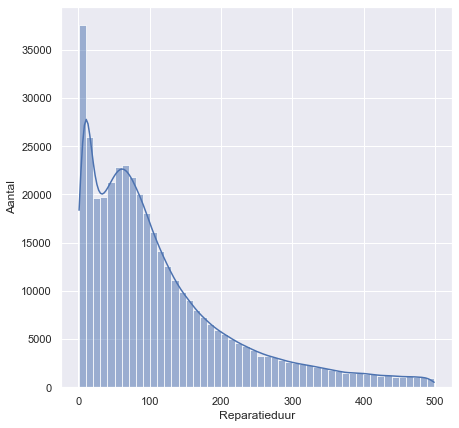

In [151]:

plt.figure(figsize=(7,7))
plt.xlabel('Reparatieduur')
plt.ylabel('Aantal')

fig = sns.histplot(data=df[(df['stm_fh_duur']< 500) & (df['stm_fh_duur'] > 0)]['stm_fh_duur'],kde=True, bins=50)


In [160]:
# Meet hoeveel correlatie er is tussen de target variable en elke feature variable
df.corr()['stm_fh_duur'].sort_values()[-10:]

stm_sap_meld_ddt          0.031356
stm_aanngeb_ddt           0.031875
stm_sap_mon_meld_ddt      0.031898
stm_sap_meldtekst         0.032676
stm_sap_meldtekst_lang    0.033379
Unnamed: 0                0.034960
stm_arbeid                0.041524
stm_hinderwaarde          0.044825
#stm_sap_meldnr           0.054002
stm_fh_duur               1.000000
Name: stm_fh_duur, dtype: float64

# Data understanding hypothese

Hiernaast hebben we ook wat analyse over de hypothese. We zien in de onderstaande grafieken dat het gemiddelde verschil tussen de prognose en actuele hersteltijd altijd boven de 0 is, dat de behoudend is voor de prognose. De grafiek laat zien dat dit bij elk afsnijding van de outliers is.

Daarnaast zien we dat het relatieve verschil gemiddeld 200% is bij elke afsnijding.

Hierna zijn er ook wat plotten gegeven over wat samples van de data, die ook op een oog opslag laten zien dat de prognose vaak te laag is. Een blauwe balk betekent dat de prognose lager was dan de actuele herstel tijd.


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


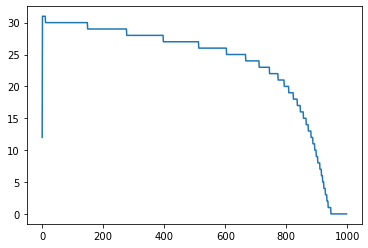

In [800]:
df = df_org.dropna()
df['stm_progfh_in_duur'] = pd.to_numeric(df['stm_progfh_in_duur'], errors='coerce')
df = df.dropna()

meds = []
for i in range(1, 999):
    print(i, end="\r")
    diff = (df['stm_fh_duur'] - df['stm_progfh_in_duur'])
    meds.append(diff.median())
    df = df[df['stm_progfh_in_duur'] < 999 - i]
    df = df[df['stm_fh_duur'] < 999 - i]
    
plt.plot(meds)
plt.show()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


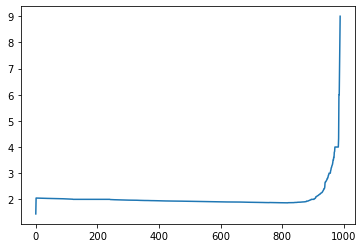

In [799]:
df = df_org.dropna()
df['stm_progfh_in_duur'] = pd.to_numeric(df['stm_progfh_in_duur'], errors='coerce')
df = df.dropna()

meds = []
for i in range(1, 999):
    print(i, end="\r")
    diff = (df['stm_fh_duur'] / df['stm_progfh_in_duur'])
    meds.append(diff.median())
    
    df = df[df['stm_progfh_in_duur'] < 999 - i]
    df = df[df['stm_fh_duur'] < 999 - i]
    
plt.plot(meds)
plt.show()

37.0
371.0
54.708527698124236


<BarContainer object of 1000 artists>

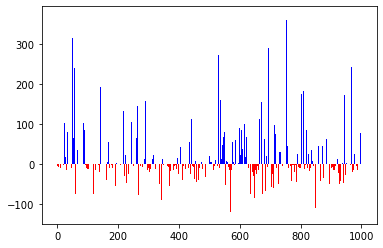

In [49]:
diff = (df['stm_fh_duur'] - df['stm_progfh_in_duur'])
print(diff.median())
print(diff.max())
print(sum(diff) / len(diff))


rs = 7384 + 100
fig = plt.figure()
ax = plt.subplot(111)
mask1 = np.array(diff[rs:rs + 1000])*np.array(diff[rs:rs + 1000] < 0)
mask2 = np.array(diff[rs:rs + 1000])*np.array(diff[rs:rs + 1000] >= 0)

ax.bar(range(len(mask1)), mask1, width=1, color='r')
ax.bar(range(len(mask2)), mask2, width=1, color='b')


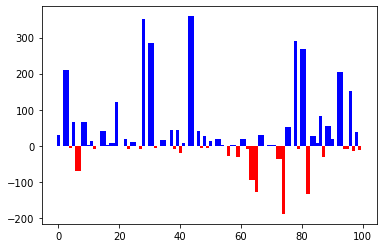

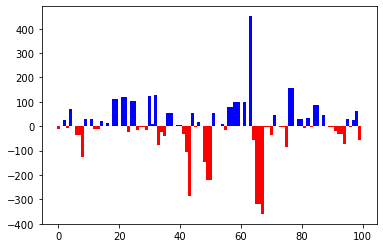

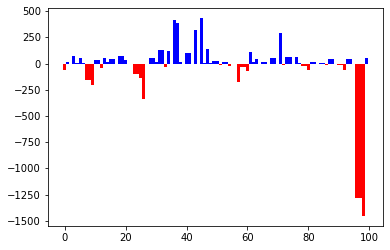

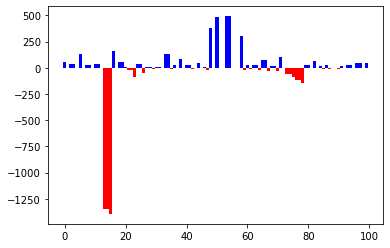

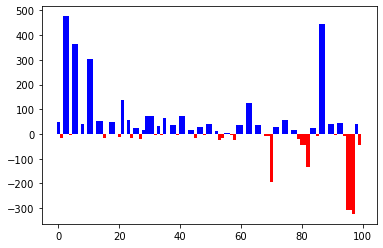

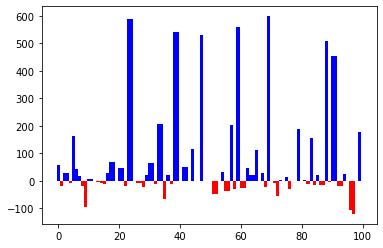

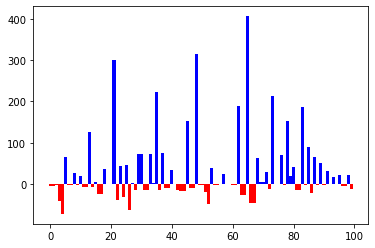

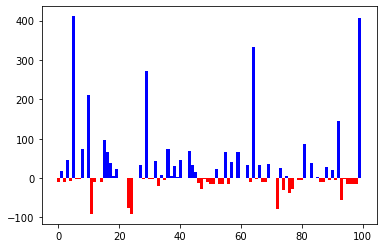

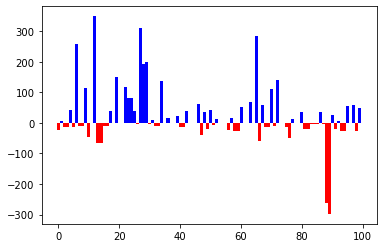

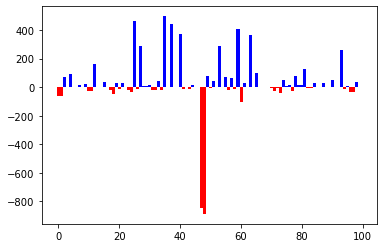

In [429]:
diff = (df['stm_fh_duur'] - df['stm_progfh_in_duur'])
for i in range(10):
    rs = 7384 + i*100
    fig = plt.figure()
    ax = plt.subplot(111)
    mask1 = np.array(diff[rs:rs + 100])*np.array(diff[rs:rs + 100] < 0)
    mask2 = np.array(diff[rs:rs + 100])*np.array(diff[rs:rs + 100] >= 0)

    ax.bar(range(len(mask1)), mask1, width=1, color='r')
    ax.bar(range(len(mask2)), mask2, width=1, color='b')

# Data preperation

Hier zullen we de data klaar maken om te kunnen gebruiken. We beginnen met het verwijderen van outliers, waarbij we de standaard IQR methode gebruiken. Daarbij zetten we ook de meldtijd om in gecategorizeerde boolean variablen. Waar de meldtijd veranderd in een dag sectie. Na het normalizeren van de data kijken we nogmaals naar de correlatie matrix (deze correlatie matrix gaat niet over de genormalizeerde data)

In [14]:
# remove 0 values
df = df[df['stm_progfh_in_duur'] > 0 ]
df = df[df['stm_fh_duur'] > 0 ]

df = df[df['stm_progfh_in_duur'] < 999 ]
df = df[df['stm_fh_duur'] < 999 ]

outlier_range = 1.5

q1=df['stm_fh_duur'].quantile(0.25)
q3=df['stm_fh_duur'].quantile(0.75)
IQR=q3-q1

df = df[~((df['stm_fh_duur']<(q1-outlier_range*IQR)) | (df['stm_fh_duur']>(q3+outlier_range*IQR)))]

# stm_progfh_in_duur
q1=df['stm_progfh_in_duur'].quantile(0.25)
q3=df['stm_progfh_in_duur'].quantile(0.75)
IQR=q3-q1

df = df[~((df['stm_progfh_in_duur']<(q1-outlier_range*IQR)) | (df['stm_progfh_in_duur']>(q3+outlier_range*IQR)))]


df

,#stm_sap_meldnr,stm_mon_nr,stm_sap_meld_ddt,stm_sap_mon_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_km_van_mld,stm_km_tot_mld,...,stm_rapportage_maand,stm_rapportage_jaar,stm_x_bron_publ_dt,stm_x_bron_bestandsnaam,stm_x_bron_arch_dt,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_start_sessie_dt,stm_x_vervallen_ind
32099,50112759,1486679.0,18831,18830,17992,17917,158,104.0,0.0,0.0,...,6.0,2012.0,18831,0,0,1.0,1518.0,12709696.0,0,0.0
84560,50142091,3491144.0,33066,33069,32853,32252,220,23.0,0.0,0.0,...,2.0,2016.0,22466,363,214,0.0,313568.0,3690221.0,457,0.0
84561,50142091,3491144.0,33066,33069,32854,32252,220,23.0,0.0,0.0,...,7.0,2016.0,22576,467,0,1.0,411816.0,3690221.0,602,0.0
86879,50142874,3574002.0,33642,33645,33967,32888,16,119.0,20900.0,21700.0,...,3.0,2016.0,22640,533,225,0.0,334068.0,3693237.0,695,0.0
86880,50142874,3574002.0,33642,33645,33967,32888,16,119.0,20900.0,21700.0,...,4.0,2016.0,22609,507,214,0.0,350782.0,3693237.0,660,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865462,80910134,0.0,434014,435729,461308,438590,38,54.0,42630.0,42630.0,...,4.0,2018.0,23271,1131,455,0.0,449105.0,3771388.0,1743,0.0
865463,80910134,0.0,434014,435729,461308,438590,38,54.0,42630.0,42630.0,...,5.0,2018.0,23181,1027,0,1.0,483668.0,3771388.0,1558,0.0
865467,80910137,4898369.0,434016,435731,461316,438598,43,553.0,21560.0,21589.0,...,4.0,2018.0,23271,1124,455,0.0,441010.0,3771390.0,1733,0.0
865468,80910137,4898369.0,434016,435731,461316,438598,43,553.0,21560.0,21589.0,...,5.0,2018.0,23181,1027,469,0.0,483668.0,3771390.0,1558,0.0


In [15]:
condition_ochtend_spits = (df['stm_sap_meldtijd'] >= '06:30:00') & (df['stm_sap_meldtijd'] <= '09:00:00')
df['spits_ochtend'] = np.where(condition_ochtend_spits, 1, 0) 

condition_avond_spits = (df['stm_sap_meldtijd'] >= '16:00:00') & (df['stm_sap_meldtijd'] <= '18:30:00')
df['spits_avond'] = np.where(condition_avond_spits, 1, 0) 

condition_nacht = (df['stm_sap_meldtijd'] <= '06:30:00') | (df['stm_sap_meldtijd'] >= '22:00:00')
df['nacht'] = np.where(condition_nacht, 1, 0)

condition_overdag = (df['stm_sap_meldtijd'] >= '09:00:00') & (df['stm_sap_meldtijd'] <= '16:00:00')
df['overdag'] = np.where(condition_avond_spits, 1, 0) 

condition_overig1 = (df['stm_sap_meldtijd'] >= '18:30:00') & (df['stm_sap_meldtijd'] <= '22:00:00')
df['avond'] = np.where(condition_avond_spits, 1, 0) 
df = df.drop(columns=['stm_sap_meldtijd'])
df

,#stm_sap_meldnr,stm_mon_nr,stm_sap_meld_ddt,stm_sap_mon_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_km_van_mld,stm_km_tot_mld,...,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_start_sessie_dt,stm_x_vervallen_ind,spits_ochtend,spits_avond,nacht,overdag,avond
32099,50112759,1486679.0,18831,18830,17992,17917,158,104.0,0.0,0.0,...,1.0,1518.0,12709696.0,0,0.0,0,0,0,0,0
84560,50142091,3491144.0,33066,33069,32853,32252,220,23.0,0.0,0.0,...,0.0,313568.0,3690221.0,457,0.0,0,0,0,0,0
84561,50142091,3491144.0,33066,33069,32854,32252,220,23.0,0.0,0.0,...,1.0,411816.0,3690221.0,602,0.0,0,0,0,0,0
86879,50142874,3574002.0,33642,33645,33967,32888,16,119.0,20900.0,21700.0,...,0.0,334068.0,3693237.0,695,0.0,0,0,0,0,0
86880,50142874,3574002.0,33642,33645,33967,32888,16,119.0,20900.0,21700.0,...,0.0,350782.0,3693237.0,660,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865462,80910134,0.0,434014,435729,461308,438590,38,54.0,42630.0,42630.0,...,0.0,449105.0,3771388.0,1743,0.0,0,1,0,1,1
865463,80910134,0.0,434014,435729,461308,438590,38,54.0,42630.0,42630.0,...,1.0,483668.0,3771388.0,1558,0.0,0,1,0,1,1
865467,80910137,4898369.0,434016,435731,461316,438598,43,553.0,21560.0,21589.0,...,0.0,441010.0,3771390.0,1733,0.0,0,0,0,0,0
865468,80910137,4898369.0,434016,435731,461316,438598,43,553.0,21560.0,21589.0,...,0.0,483668.0,3771390.0,1558,0.0,0,0,0,0,0


In [16]:

names = df.columns
df = df.reset_index(drop=True)
d = preprocessing.Normalizer().fit(df)
scaled_df = d.transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

scaled_df

,#stm_sap_meldnr,stm_mon_nr,stm_sap_meld_ddt,stm_sap_mon_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_km_van_mld,stm_km_tot_mld,...,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_start_sessie_dt,stm_x_vervallen_ind,spits_ochtend,spits_avond,nacht,overdag,avond
0,0.968910,0.028744,0.000364,0.000364,0.000348,0.000346,3.054866e-06,2.010798e-06,0.000000,0.000000,...,1.933460e-08,0.000029,0.245737,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00
1,0.047259,0.003290,0.000031,0.000031,0.000031,0.000030,2.073485e-07,2.167734e-08,0.000000,0.000000,...,0.000000e+00,0.000296,0.003478,4.307193e-07,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00
2,0.047259,0.003290,0.000031,0.000031,0.000031,0.000030,2.073485e-07,2.167734e-08,0.000000,0.000000,...,9.424931e-10,0.000388,0.003478,5.673808e-07,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00
3,0.047256,0.003368,0.000032,0.000032,0.000032,0.000031,1.507873e-08,1.121480e-07,0.000020,0.000020,...,0.000000e+00,0.000315,0.003481,6.549821e-07,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00
4,0.047256,0.003368,0.000032,0.000032,0.000032,0.000031,1.507873e-08,1.121480e-07,0.000020,0.000020,...,0.000000e+00,0.000331,0.003481,6.219974e-07,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344909,0.998813,0.000000,0.005358,0.005379,0.005695,0.005414,4.690992e-07,6.666147e-07,0.000526,0.000526,...,0.000000e+00,0.005544,0.046557,2.151684e-05,0.0,0.0,1.234472e-08,0.0,1.234472e-08,1.234472e-08
344910,0.998810,0.000000,0.005358,0.005379,0.005695,0.005414,4.690981e-07,6.666131e-07,0.000526,0.000526,...,1.234469e-08,0.005971,0.046557,1.923302e-05,0.0,0.0,1.234469e-08,0.0,1.234469e-08,1.234469e-08
344911,0.996993,0.060359,0.005348,0.005369,0.005684,0.005405,5.298555e-07,6.814189e-06,0.000266,0.000266,...,0.000000e+00,0.005434,0.046472,2.135441e-05,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00
344912,0.996990,0.060359,0.005348,0.005369,0.005684,0.005404,5.298539e-07,6.814168e-06,0.000266,0.000266,...,0.000000e+00,0.005960,0.046472,1.919796e-05,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00


In [17]:
print(df['stm_fh_duur'].max())
print(df['stm_progfh_in_duur'].max())


444.0
285.0


In [18]:
# Meet hoeveel correlatie er is tussen de target variable en elke feature variable
df.corr()['stm_fh_duur'].sort_values()[-10:]

stm_afspr_aanvangtijd       0.055912
stm_x_bk                    0.059994
spits_ochtend               0.068910
#stm_sap_meldnr             0.069123
nacht                       0.070204
stm_afspr_func_hersteldd    0.103071
stm_afspr_aanvangdd         0.139790
stm_prioriteit              0.239870
stm_progfh_in_duur          0.366516
stm_fh_duur                 1.000000
Name: stm_fh_duur, dtype: float64

# Baseline

Hieronder zullen verschillende baselines vertoond worden. Onderandere de baseline van de mediaan aanhouden, het gemiddelde aanhoude, en de prognose aanhouden.

In [19]:

average = sum(df['stm_fh_duur']) / len(df['stm_fh_duur'])
baseline = [average] * len(df['stm_fh_duur'])
np.sqrt(mean_squared_error(df['stm_fh_duur'], baseline))

87.13104988301171

In [20]:
median = df['stm_fh_duur'].median()
baseline = [median] * len(df['stm_fh_duur'])
np.sqrt(mean_squared_error(df['stm_fh_duur'], baseline))

90.0844187884419

In [21]:
print(np.sqrt(mean_squared_error(df['stm_fh_duur'], df['stm_progfh_in_duur'])))


85.79534336407596


# model

We zullen nu het model maken. De gekozen features zijn de top 6 features met de hoogste correlatie.

In [63]:
"""Seperate the dataset into its label (y) and input data (X)"""
X = scaled_df[['stm_prioriteit', 'stm_progfh_in_duur', "nacht",
       "stm_afspr_aanvangdd", "stm_afspr_func_hersteldd", "stm_afspr_aanvangtijd"]].values

y = df['stm_fh_duur'].values
print("Labels:\n {} \n".format(y))
print("Training data: \n {} \n".format(X))


Labels:
 [ 43.   7.   7. ... 163. 163. 163.] 

Training data: 
 [[1.74011359e-07 2.32015146e-06 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.48243777e-09 7.53994468e-08 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.48243750e-09 7.53994444e-08 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.46444435e-08 9.85777740e-07 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.46443697e-08 9.85774788e-07 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.46448021e-08 9.85792083e-07 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 



In [64]:
"""Split the data into train and test data, the test data is 20% of the entire dataset."""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,  random_state=3)
print("Size of test dataset: {}".format(len(X_test)))
print("Size of train dataset: {}".format(len(X_train)))

Size of test dataset: 68983
Size of train dataset: 275931


In [65]:
# Instance and fit 
model = DecisionTreeRegressor(max_depth=29)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print("Score of the model: {}".format(score))
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

Score of the model: 0.050557154041611874


84.75681460605992

In [66]:
# Predictions
preds = model.predict(X_test)

# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': preds,
                            'Error': preds - y_test})

# View
print("Amount precisely 0.0 error:", len(performance[performance["Error"] == 0]))

performance


Amount precisely 0.0 error: 1516


,True Value,Prediction,Error
0,57.0,108.147813,51.147813
1,237.0,108.147813,-128.852187
2,216.0,108.147813,-107.852187
3,70.0,108.147813,38.147813
4,70.0,108.147813,38.147813
...,...,...,...
68978,116.0,108.147813,-7.852187
68979,117.0,82.625568,-34.374432
68980,93.0,108.147813,15.147813
68981,58.0,108.147813,50.147813


# conclusie

Vanuit de analyse over de hypothese is duidelijk te concluderen dat de prognose te conservatief is in zijn uitslag. Daarbij is ook aan te tonen dat een model betere resultaten kan opleveren dan het aanhouden van een mediaan. Er is ook duidelijk een correlatie te vinden in de hersteltijd van een probleem, en de kwaliteiten van een probleem.